# CNN Fashion MNIST

A CNN based image classification in Tensoflow 2 on the fashion MNIST dataset. The example uses the functional API.

## Load Packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
print(tf.__version__)

2.3.1


## Load Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

x_train Shape: (60000, 28, 28)
x_test Shape: (10000, 28, 28)
y_train Shape: (60000,)
y_test Shape: (10000,)


In [3]:
# Since CNN expects a 3D we need to add a superfluous dimension to our data
import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)

x_train Shape: (60000, 28, 28, 1)
x_test Shape: (10000, 28, 28, 1)


In [4]:
# Get number of classes
K = len(set(y_train))
print("Number of classes", K)

Number of classes 10


## Build Model

In [6]:
# Using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i) # 32 = output filters
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [7]:
# compile model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

## Train

In [8]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5181 - accuracy: 0.8069 - val_loss: 0.4206 - val_accuracy: 0.8374
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3626 - accuracy: 0.8643 - val_loss: 0.3526 - val_accuracy: 0.8658
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3141 - accuracy: 0.8820 - val_loss: 0.3137 - val_accuracy: 0.8857
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2803 - accuracy: 0.8939 - val_loss: 0.3126 - val_accuracy: 0.8858
Epoch 5/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2551 - accuracy: 0.9039 - val_loss: 0.3058 - val_accuracy: 0.8871
Epoch 6/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2327 - accuracy: 0.9112 - val_loss: 0.2977 - val_accuracy: 0.8922
Epoch 7/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2143 - accuracy: 0.9193 - val_loss: 0.3080 - val_ac

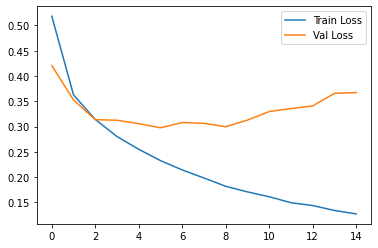

In [9]:
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend();

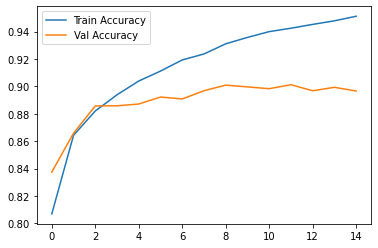

In [10]:
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Val Accuracy")
plt.legend();

Confusion matrix, without normalization
[[888   0  28  13   2   2  62   0   5   0]
 [  4 978   1  10   1   0   4   0   2   0]
 [ 20   0 850   9  52   0  68   0   1   0]
 [ 17   6  15 895  27   3  36   0   1   0]
 [  0   0  74  23 795   1 106   0   1   0]
 [  1   0   0   0   0 983   0  12   0   4]
 [130   0  68  18  65   1 710   0   8   0]
 [  0   0   0   0   0  18   0 963   0  19]
 [  5   0   8   3   5   1  10   3 965   0]
 [  1   0   0   0   0   8   0  52   0 939]]


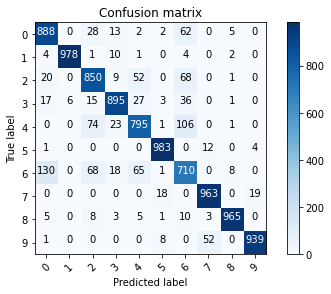

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

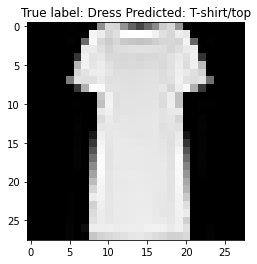

In [21]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));